In [107]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [108]:
plot_dir = plot_dir = '../../plots'

In [109]:
# read data
df = pd.read_csv("../../data/curated/individual_property_final.csv")

In [110]:
df.iloc[1]

Address                         1207/270 King Street, Melbourne VIC 3000
Bedrooms                                                             2.0
Bathrooms                                                            2.0
Closest Gov Secondary School                      University High School
Age under 20                                                         6.0
Age 20-39                                                           83.0
Age 40-59                                                           10.0
Age 60+                                                              1.0
Postcode                                                          3000.0
latitude                                                      -37.813692
longitude                                                     144.954858
SA2  code                                                    206041505.0
income_2020                                                      59201.0
2023                                               

# correlation heat map

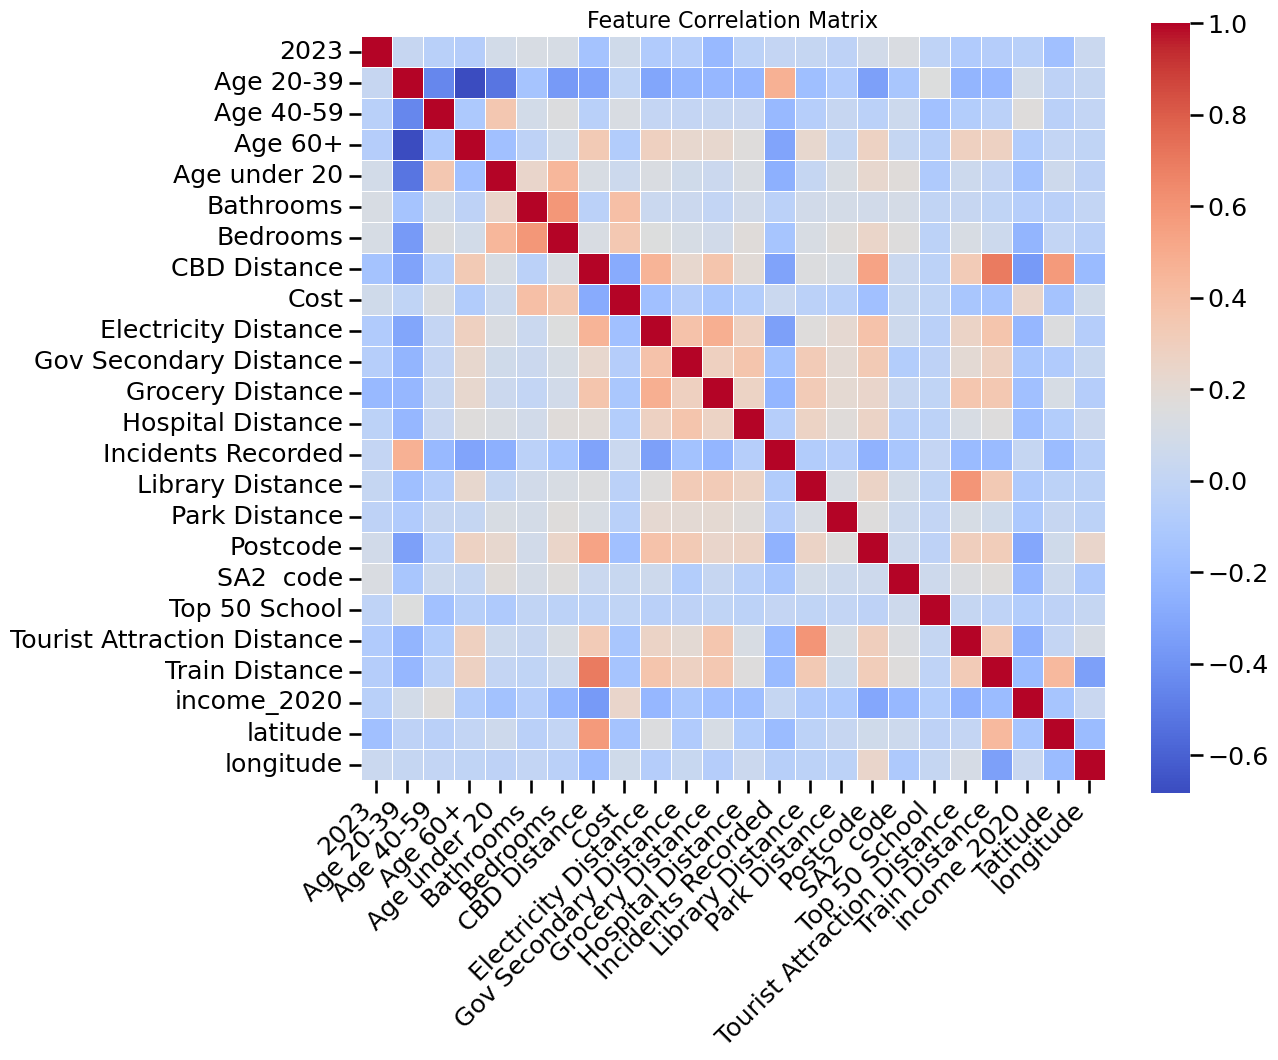

In [111]:
# Draw heat map to show the correlation matrix of numerical features in the domain dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Address', 'Closest Gov Secondary School', '2026'])

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


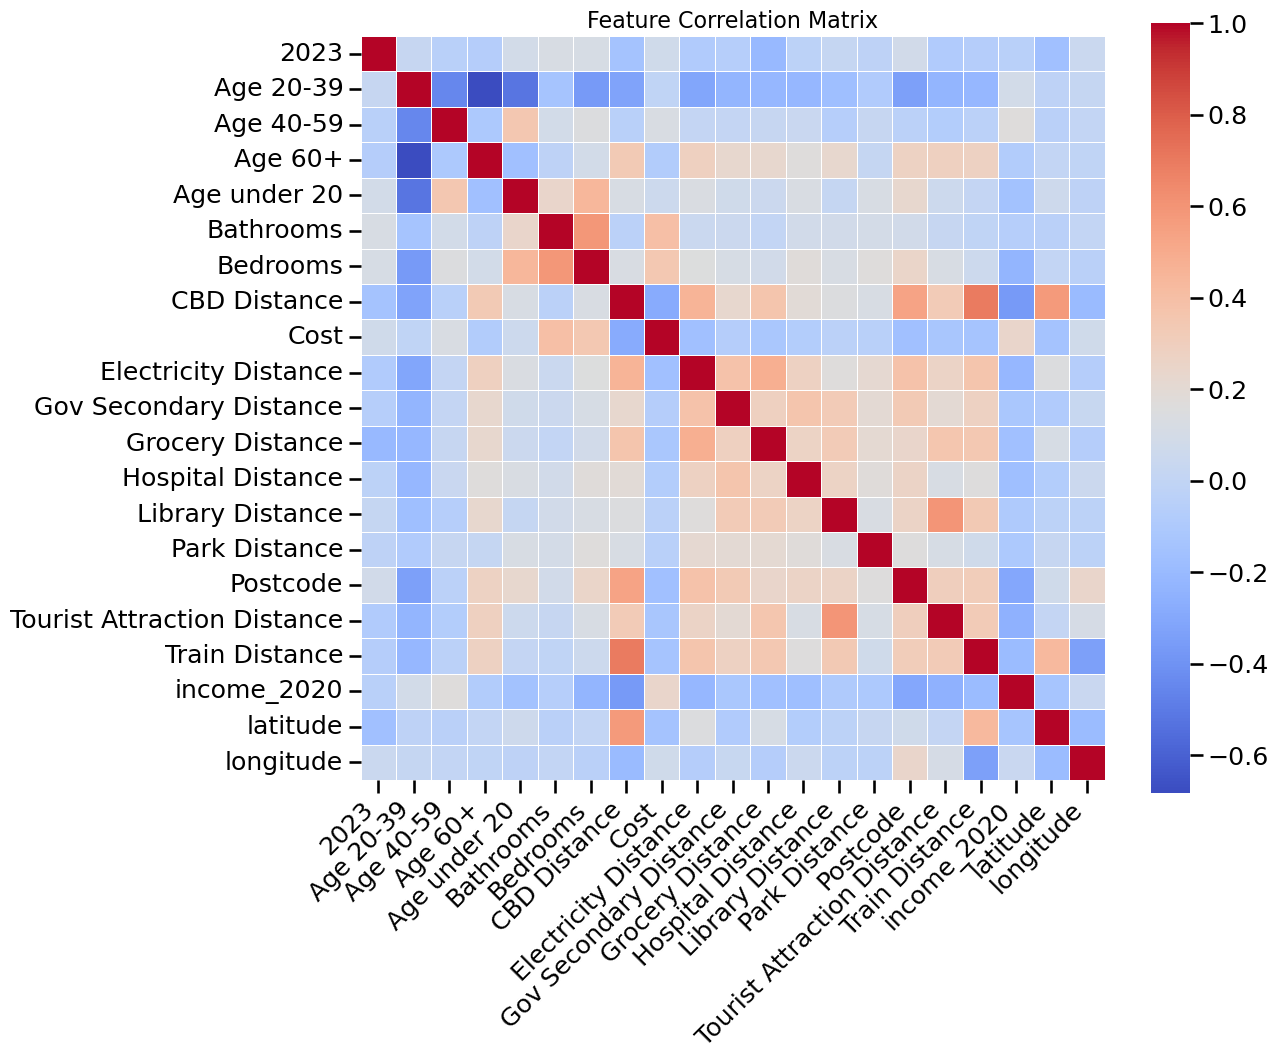

In [112]:
# Draw heat map to show the correlation matrix of numerical features in the domain dataset - remove uncorrelated features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Address', 'Closest Gov Secondary School', '2026', 'Incidents Recorded', 'Top 50 School', 'SA2  code'])

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


Factors affecting cost

0. bathroom, bedroom
1. Location ->Residential gathering area
2. Income ->Wealthy District

# income vs cbd distance(location) vs cost

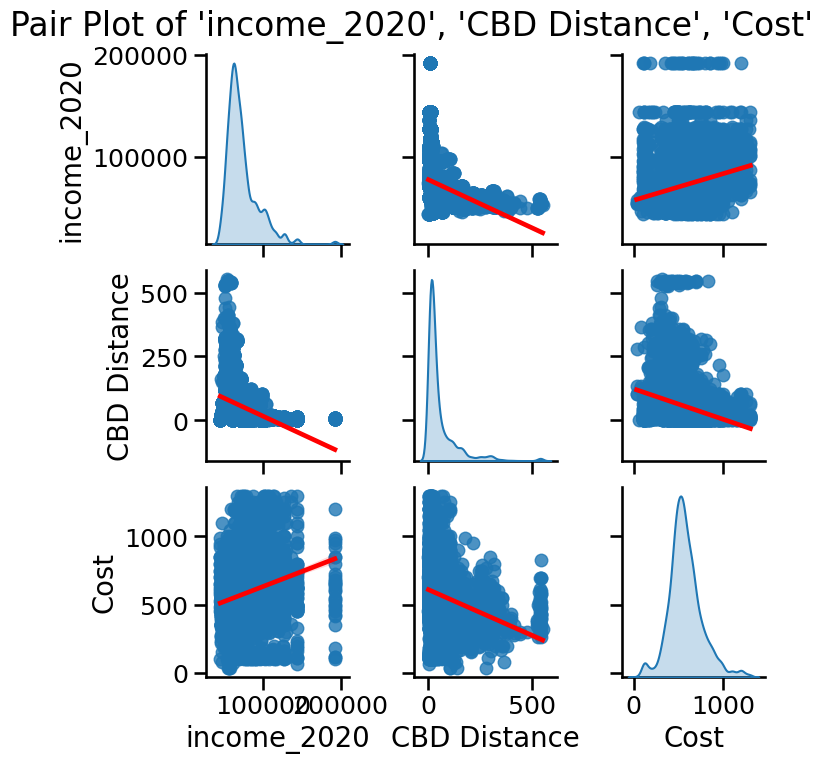

In [113]:
# income vs cbd distance vs cost
# pariplot of these 3 features
sns.set_context("talk", font_scale=1.1) 
pp_df = df[['income_2020', 'CBD Distance', 'Cost']]
sns.pairplot(pp_df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pair Plot of 'income_2020', 'CBD Distance', 'Cost'", y=1.02)

# Save the figure
#output_path = f"{plot_dir}/Pair_Plot_income_Age_CBD_Distance_Cost.png"
#plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


The closer to the CBD, the higher the income and the higher the cost

# Number of bedrooms and bathrooms vs Average Cost

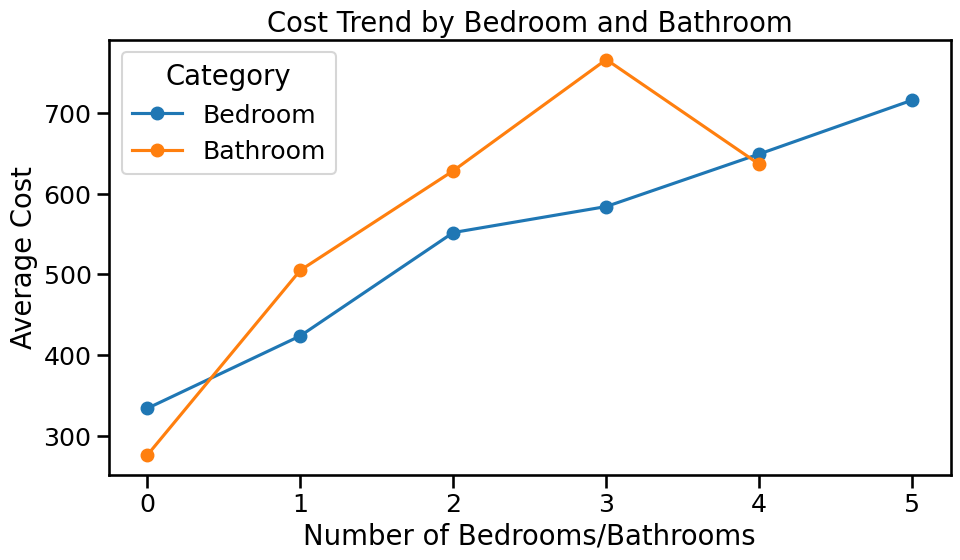

In [114]:
# Number of bedrooms and bathrooms vs Average Cost
bedroom_avg_cost = df.groupby('Bedrooms')['Cost'].mean().reset_index()
bathroom_avg_cost = df.groupby('Bathrooms')['Cost'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))

# Plot the line for bedrooms
plt.plot(bedroom_avg_cost['Bedrooms'], bedroom_avg_cost['Cost'], marker='o', label='Bedroom')

# Plot the line for bathrooms
plt.plot(bathroom_avg_cost['Bathrooms'], bathroom_avg_cost['Cost'], marker='o', label='Bathroom')

# Add title and labels
plt.title('Cost Trend by Bedroom and Bathroom')
plt.xlabel('Number of Bedrooms/Bathrooms')
plt.ylabel('Average Cost')
plt.legend(title='Category')

# Display the plot
plt.tight_layout()
plt.show()


# Cost VS Distance(location)

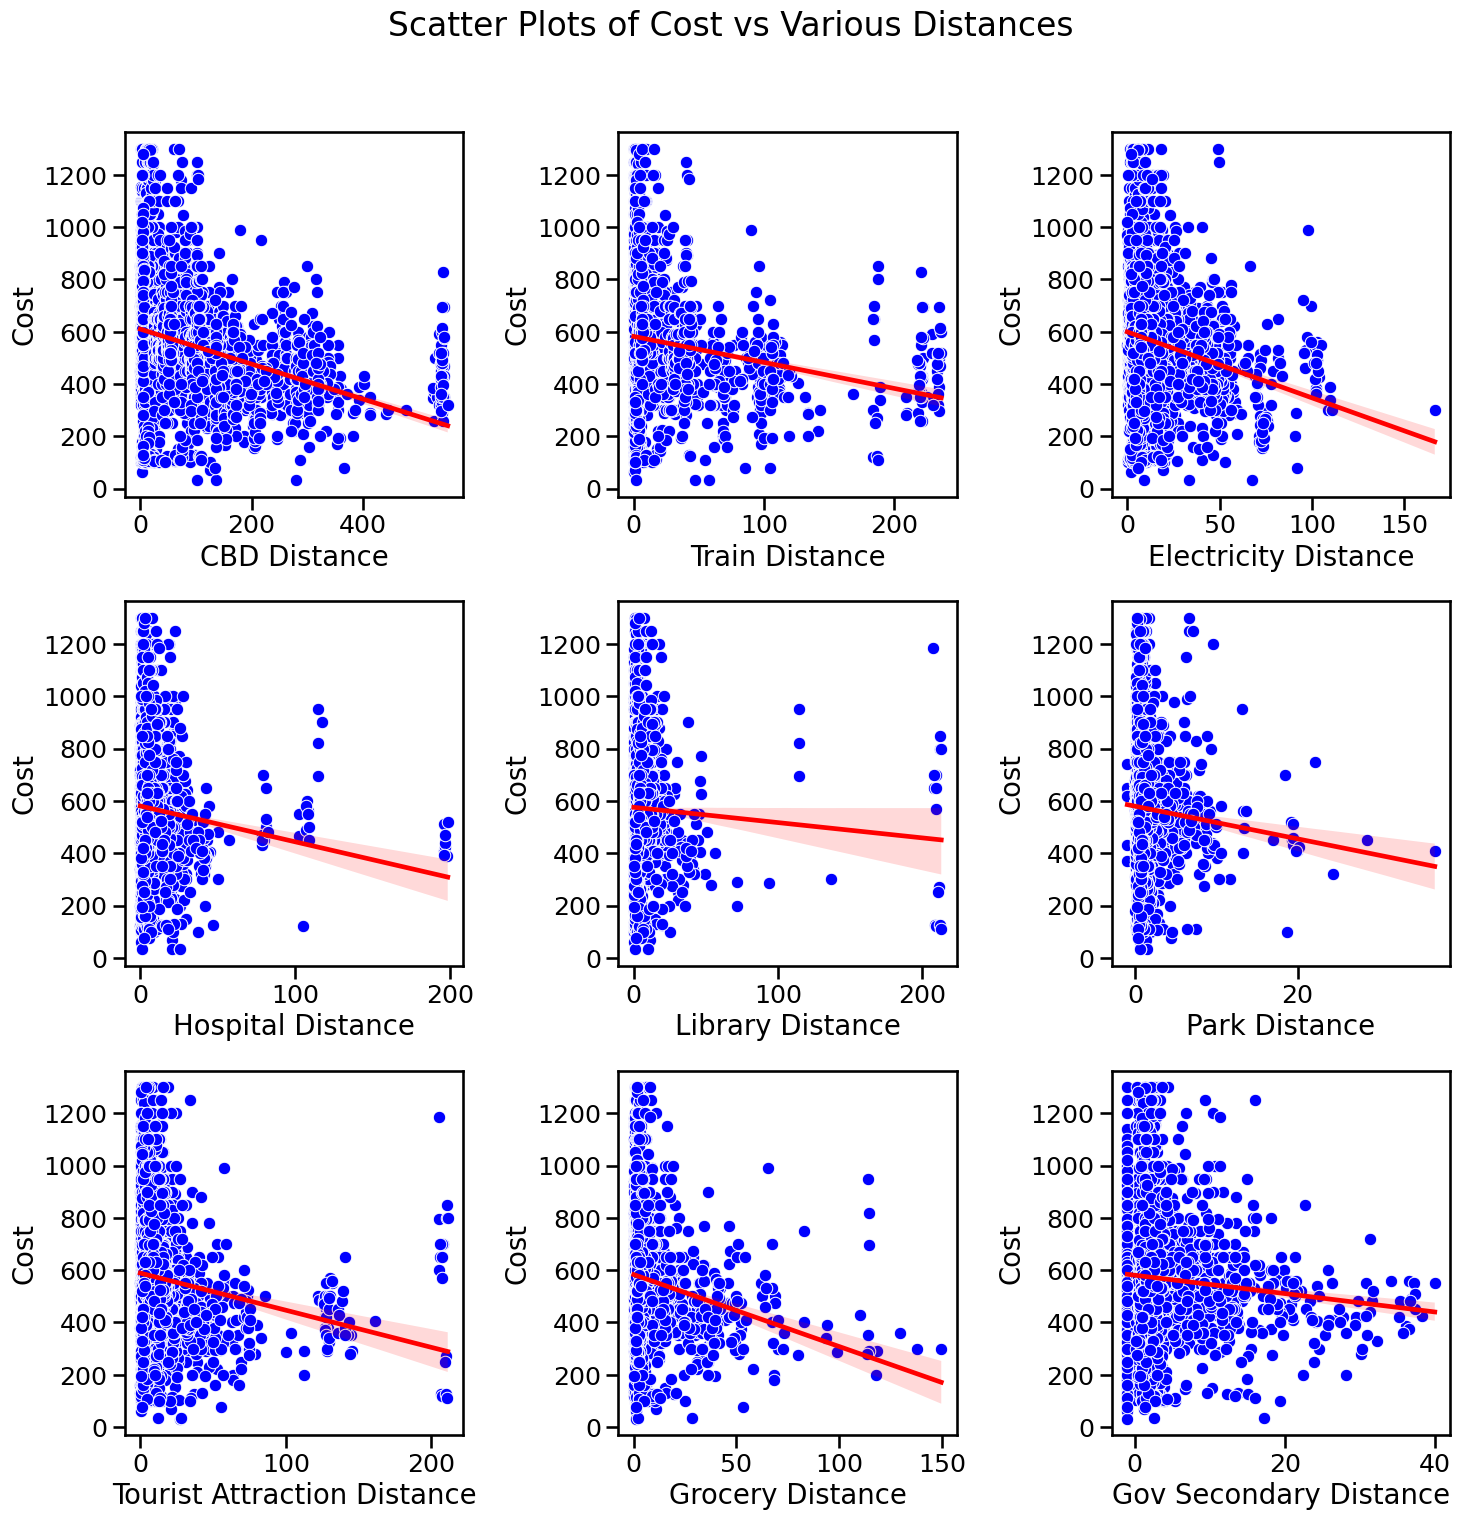

In [116]:
sns.set_context("talk", font_scale=1.1)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
cols = ['CBD Distance', 'Train Distance', 'Electricity Distance', 
        'Hospital Distance', 'Library Distance', 'Park Distance', 
        'Tourist Attraction Distance', 'Grocery Distance', 'Gov Secondary Distance']

for i, col in enumerate(cols):
    sns.scatterplot(x=col, y='Cost', data=df, ax=axes[i//3, i%3], color='blue')
    sns.regplot(x=col, y='Cost', data=df, ax=axes[i//3, i%3], scatter=False, color='red')

plt.suptitle('Scatter Plots of Cost vs Various Distances', y=1.02)
plt.tight_layout()
plt.show()


Closer, higher cost